In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
x_train = pd.read_csv("train_Df64byy.csv")
x_test = pd.read_csv("test_YCcRUnU.csv")
sample = pd.read_csv("sample_submission_QrCyCoT.csv")

In [182]:
x_train.drop(columns="ID",inplace=True)
sample = x_test["ID"]
x_test.drop(columns="ID",inplace=True)

In [183]:
sample = np.array(sample).reshape(-1,1)

In [158]:
x_train

City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0            C3         3213            Rented          Individual         36   
1            C5         1117             Owned               Joint         75   
2            C5         3732             Owned          Individual         32   
3           C24         4378             Owned               Joint         52   
4            C8         2190            Rented          Individual         44   
...         ...          ...               ...                 ...        ...   
50877        C4          845            Rented          Individual         22   
50878        C5         4188            Rented          Individual         27   
50879        C1          442            Rented          Individual         63   
50880        C1            4             Owned               Joint         71   
50881        C3         3866            Rented          Individual         24   

       Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0             36        No               X1                     14+   
1             22        No               X2                     NaN   
2             32        No              NaN                     1.0   
3             48        No               X1                     14+   
4             44        No               X2                     3.0   
...          ...       ...              ...                     ...   
50877         22        No               X3                     NaN   
50878         27        No               X3                     7.0   
50879         63        No               X2                     14+   
50880         49        No               X2                     2.0   
50881         24        No               X3                     2.0   

       Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                      3.0               22              11628.0         0  
1                      NaN               22              30510.0         0  
2                      1.0               19               7450.0         1  
3                      3.0               19              17780.0         0  
4                      1.0               16              10404.0         0  
...                    ...              ...                  ...       ...  
50877                  NaN               18               7704.0         0  
50878                  3.0                4               5408.0         0  
50879                  1.0               12              11374.0         0  
50880                  2.0               16              28179.2         1  
50881                  3.0               18              11424.0         0  

[50882 rows x 13 columns]

In [159]:
x_train.iloc[1]

City_Code                     C5
Region_Code                 1117
Accomodation_Type          Owned
Reco_Insurance_Type        Joint
Upper_Age                     75
Lower_Age                     22
Is_Spouse                     No
Health Indicator              X2
Holding_Policy_Duration      NaN
Holding_Policy_Type          NaN
Reco_Policy_Cat               22
Reco_Policy_Premium        30510
Response                       0
Name: 1, dtype: object

In [160]:
x_train.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [161]:
x_test.isnull().sum()

City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

# Checking Unique Values in each feature

In [162]:
x_train["City_Code"].value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

In [163]:
x_train["Accomodation_Type"].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [164]:
x_train["Reco_Insurance_Type"].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [165]:
x_train["Health Indicator"].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [166]:
x_train["Is_Spouse"].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [167]:
x_train["Holding_Policy_Duration"].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [168]:
x_test["Holding_Policy_Type"].iloc[67]

3.0

In [169]:
x_train["Holding_Policy_Duration"].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

# Bivariate Analysis before Filling NAN Values

In [7]:
cat_cols = ["City_Code","Accomodation_Type","Reco_Insurance_Type","Is_Spouse","Health Indicator","Holding_Policy_Duration"]

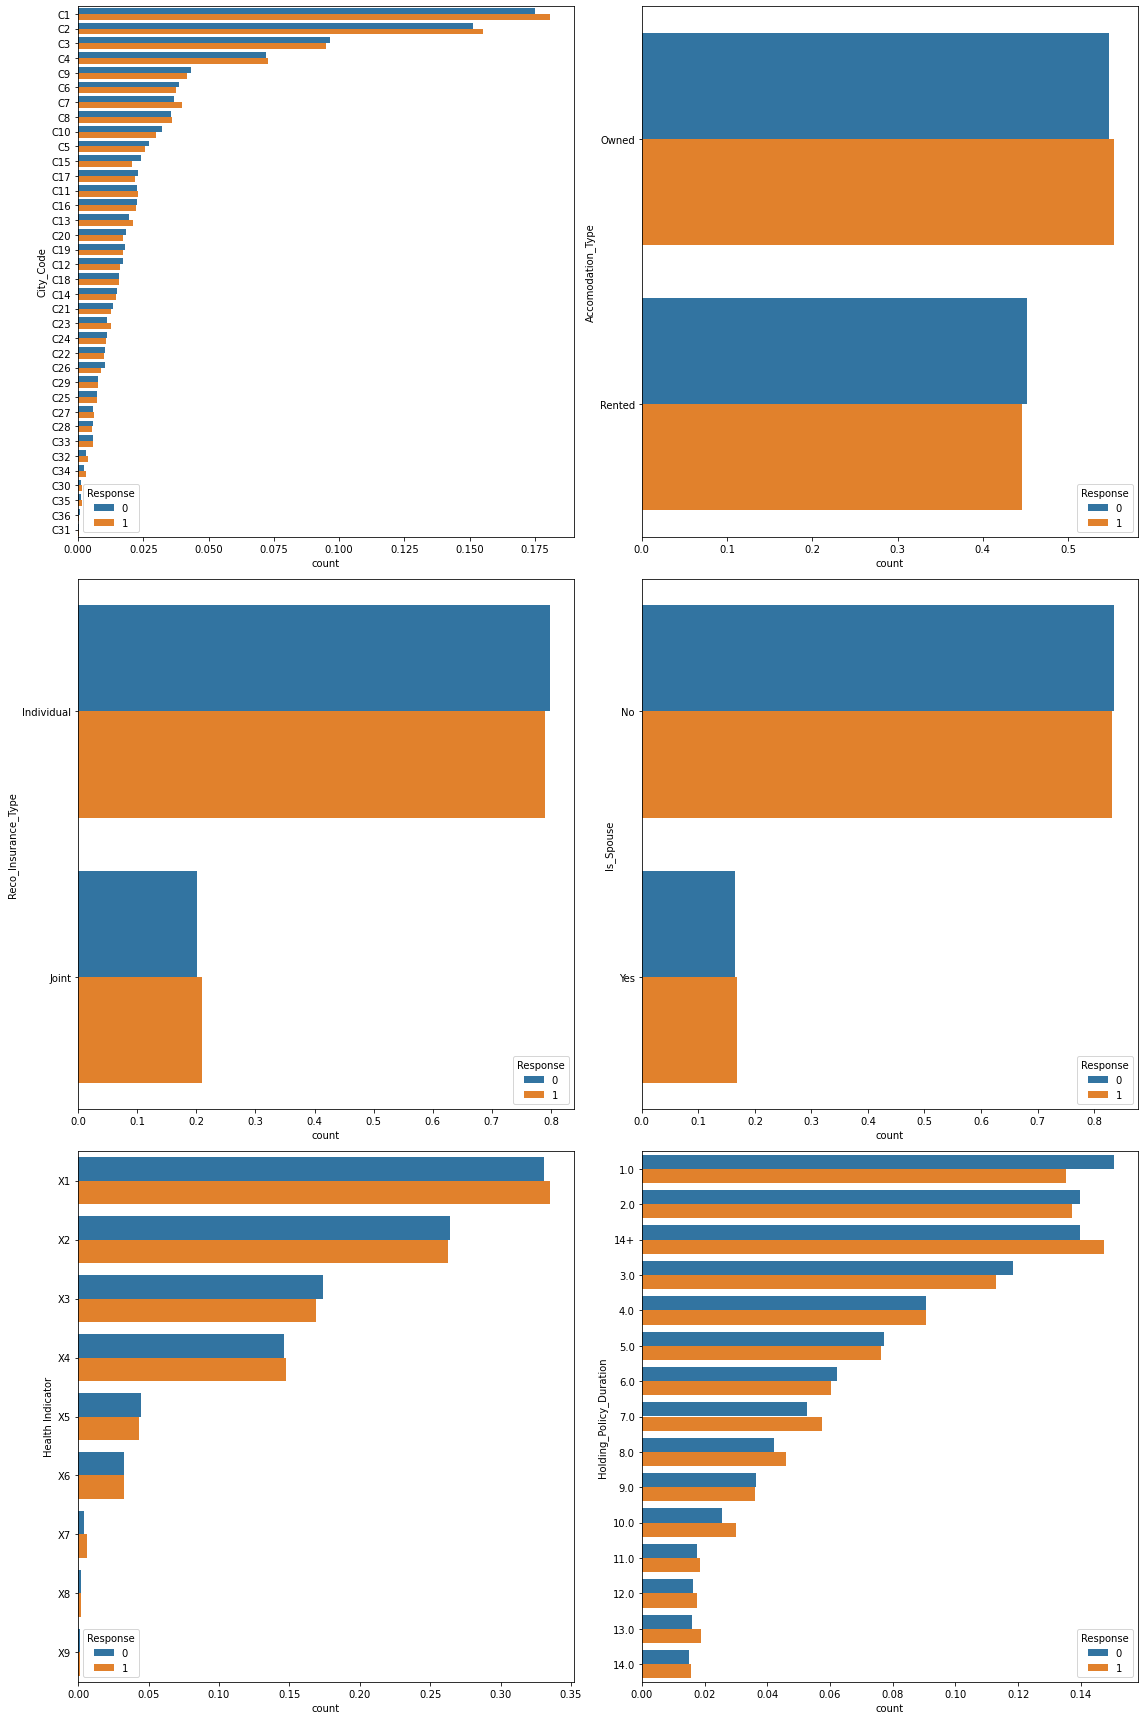

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(x_train[cat_cols]):
    fltr = x_train["Response"] == 0
    vc_a = x_train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = x_train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a["Response"] = 0
    vc_b["Response"] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue="Response", ax=axes[i])
    
_ = plt.tight_layout()

# Filling NAN Values

### 1) Holding_Policy_Duration

In [170]:
x_train["Holding_Policy_Duration"].fillna('14.0',inplace=True)
x_test["Holding_Policy_Duration"].fillna('14.0',inplace=True)

### 2) Holding_Policy_Type

In [171]:
x_train["Holding_Policy_Type"].fillna(x_train["Holding_Policy_Type"].median(),inplace=True)
x_test["Holding_Policy_Type"].fillna(x_test["Holding_Policy_Type"].median(),inplace=True)

### 3) Health Indicator

In [172]:
x_train["Health Indicator"].fillna("X9",inplace=True)
x_test["Health Indicator"].fillna("X9",inplace=True)

In [173]:
x_train.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [174]:
x_test.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

# Bivariate Analysis

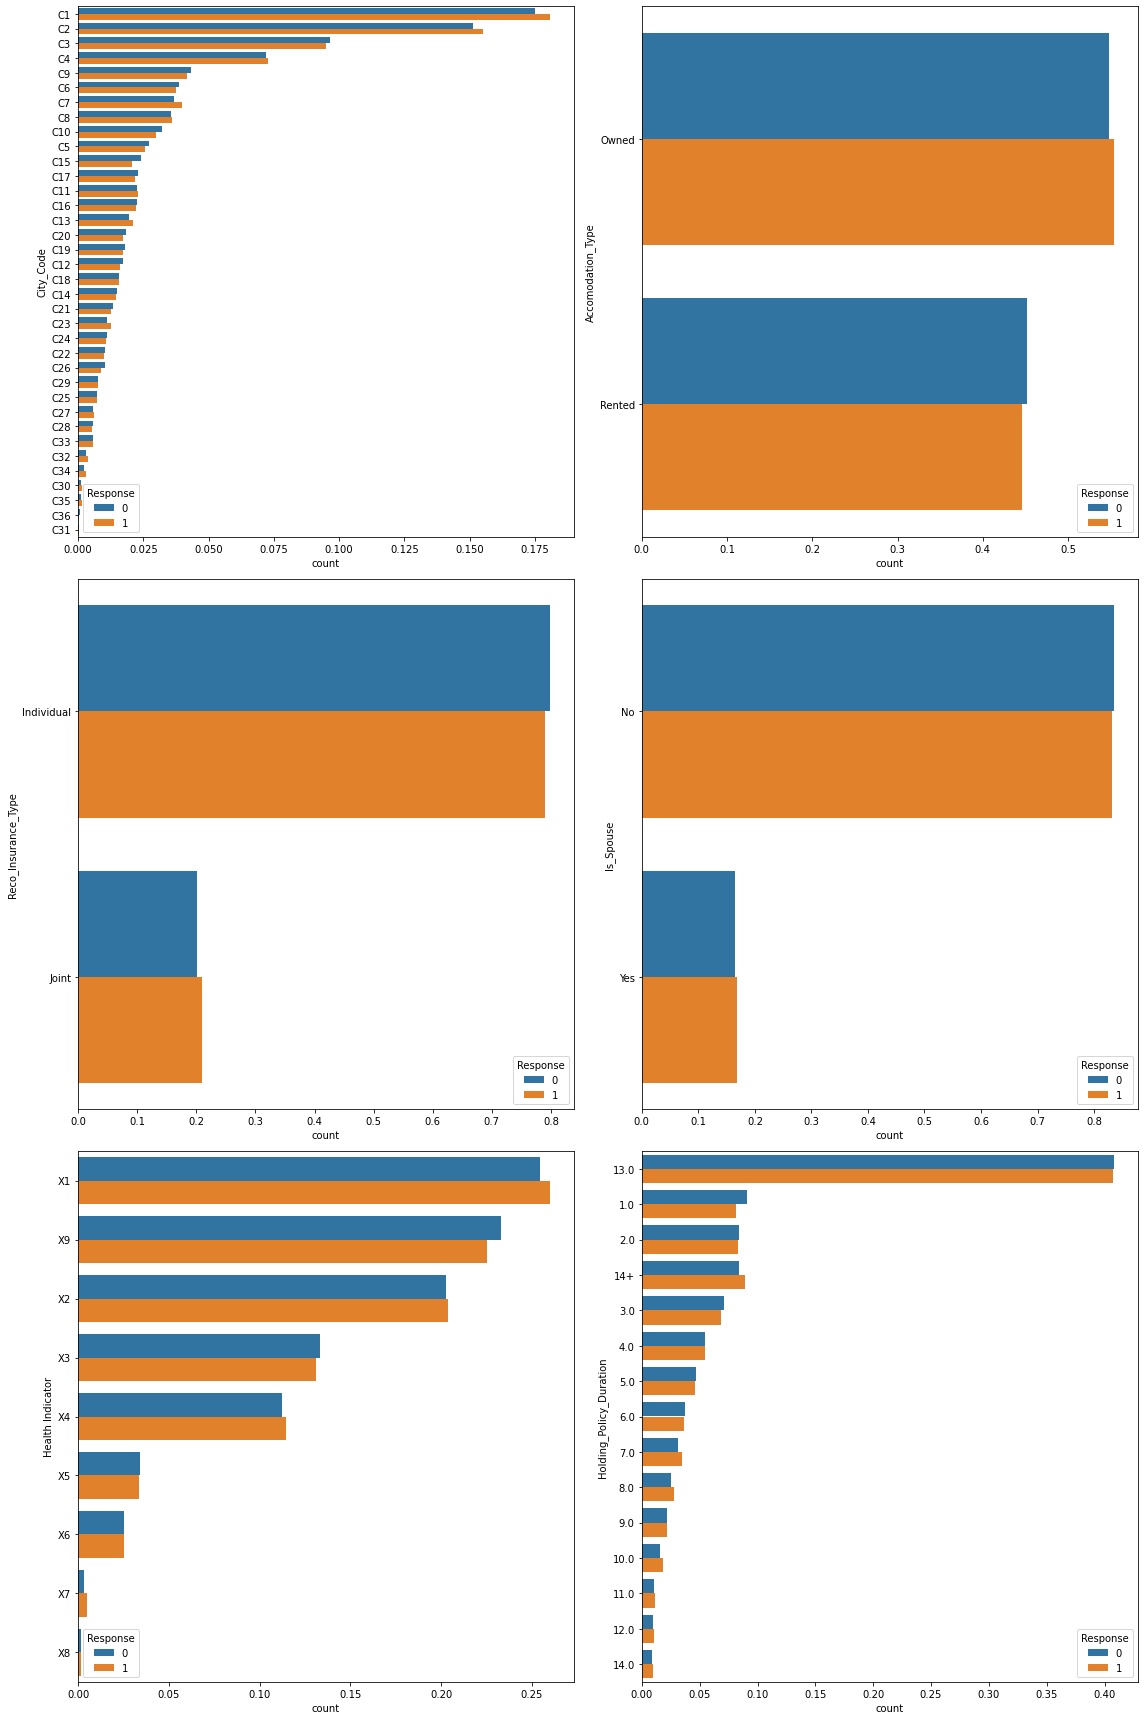

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(x_train[cat_cols]):
    fltr = x_train["Response"] == 0
    vc_a = x_train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = x_train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a["Response"] = 0
    vc_b["Response"] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue="Response", ax=axes[i])
    
_ = plt.tight_layout()

# Sampling

Reducing the amount of Majority Class as the data is highly imbalance

In [15]:
x_train["Response"].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [16]:
from sklearn.utils import resample

In [17]:
df_majority = x_train[x_train.Response==0]
df_minority = x_train[x_train.Response==1]

In [18]:
df_majority_downsampled = resample(df_majority,replace=False,n_samples=12000,random_state=123) 

In [19]:
x_train = pd.concat([df_majority_downsampled, df_minority])

In [20]:
x_train["Response"].value_counts()

1    12209
0    12000
Name: Response, dtype: int64

In [21]:
# y_train = x_train["Response"]
# x_train.drop(columns="Response",inplace=True)

# Pandas Profiling

In [22]:
from pandas_profiling import ProfileReport
prof = ProfileReport(x_train)

In [23]:
prof

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Skewness

In [175]:
continuous_col = x_train.select_dtypes(["float64","int64"]).columns

In [176]:
continuous_col

Index(['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

1) Simple Skewness Check

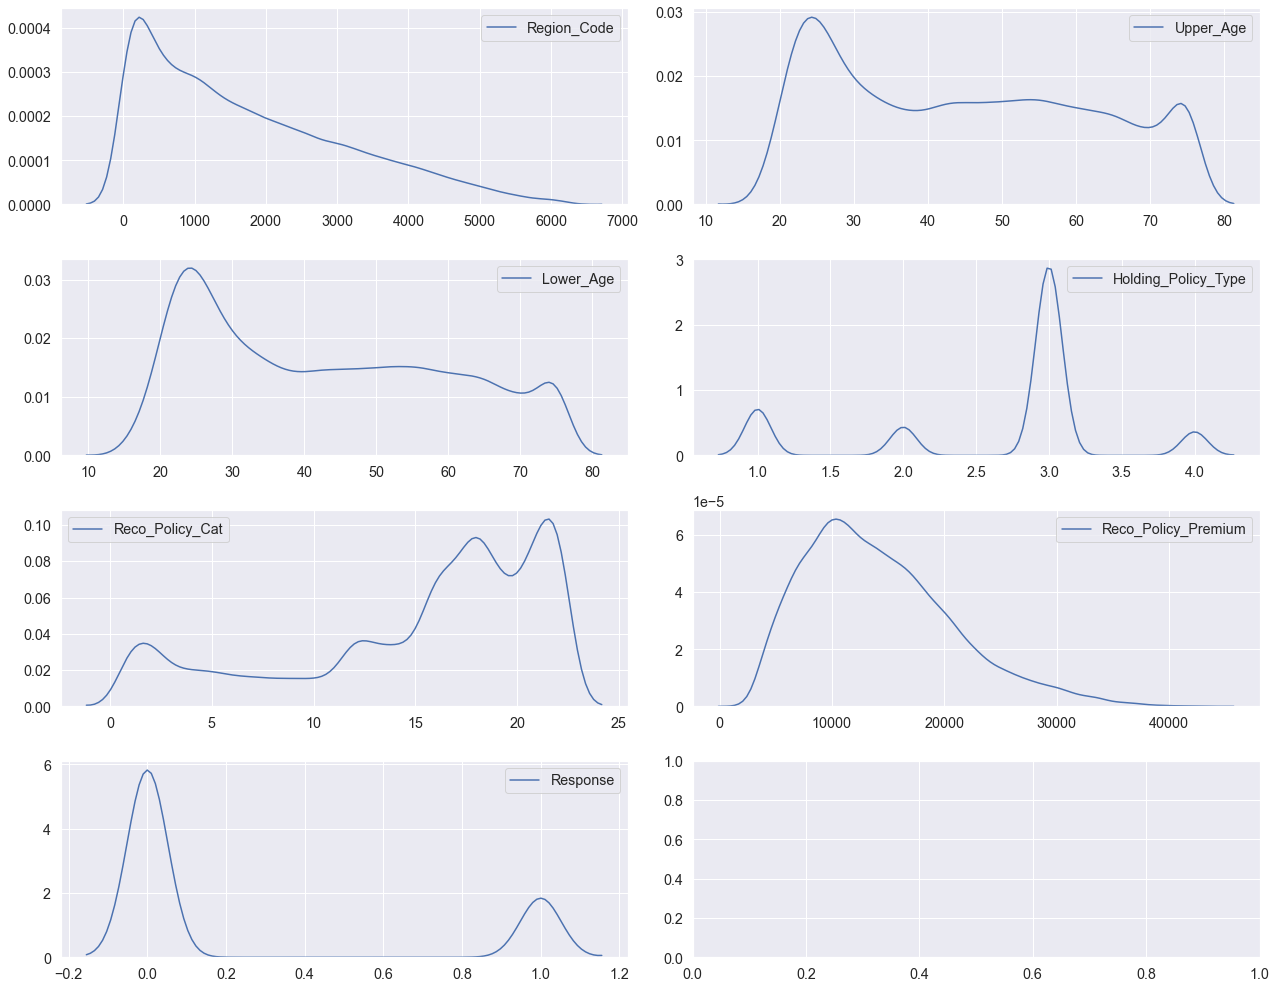

In [177]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(continuous_col):
    plot = sns.kdeplot(data=x_train[c], ax=axes[i])
    plt.tight_layout()

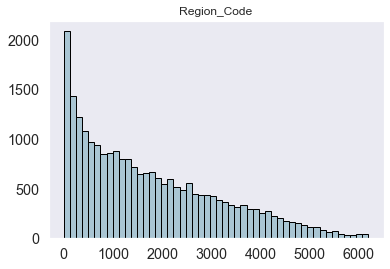

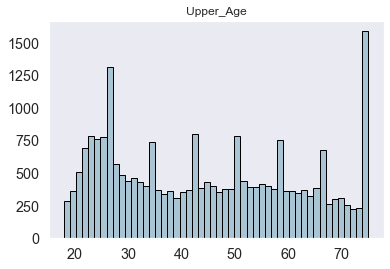

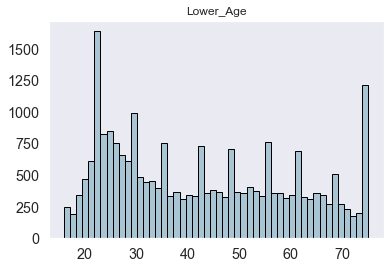

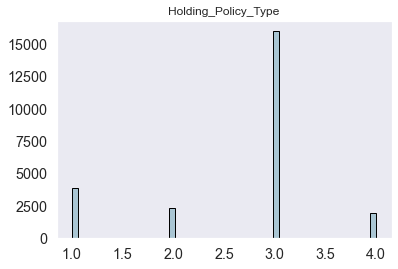

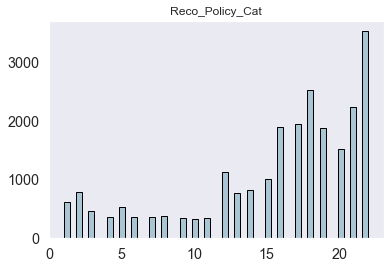

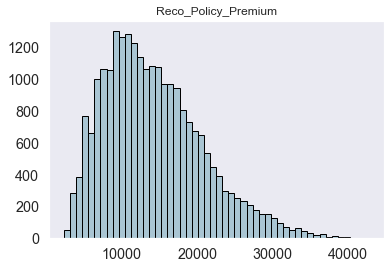

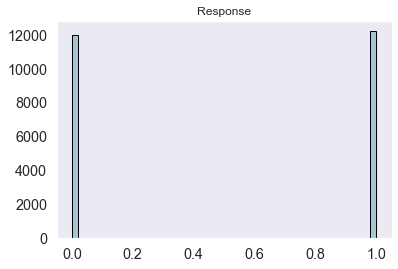

In [30]:
for col in continuous_col:
    fig,ax = plt.subplots()
    x_train[col].hist(bins=50,color='#A9C5D3',edgecolor='black',grid=False)
    ax.set_title(col, fontsize=12)

2) Using Square Root to remove Skewness

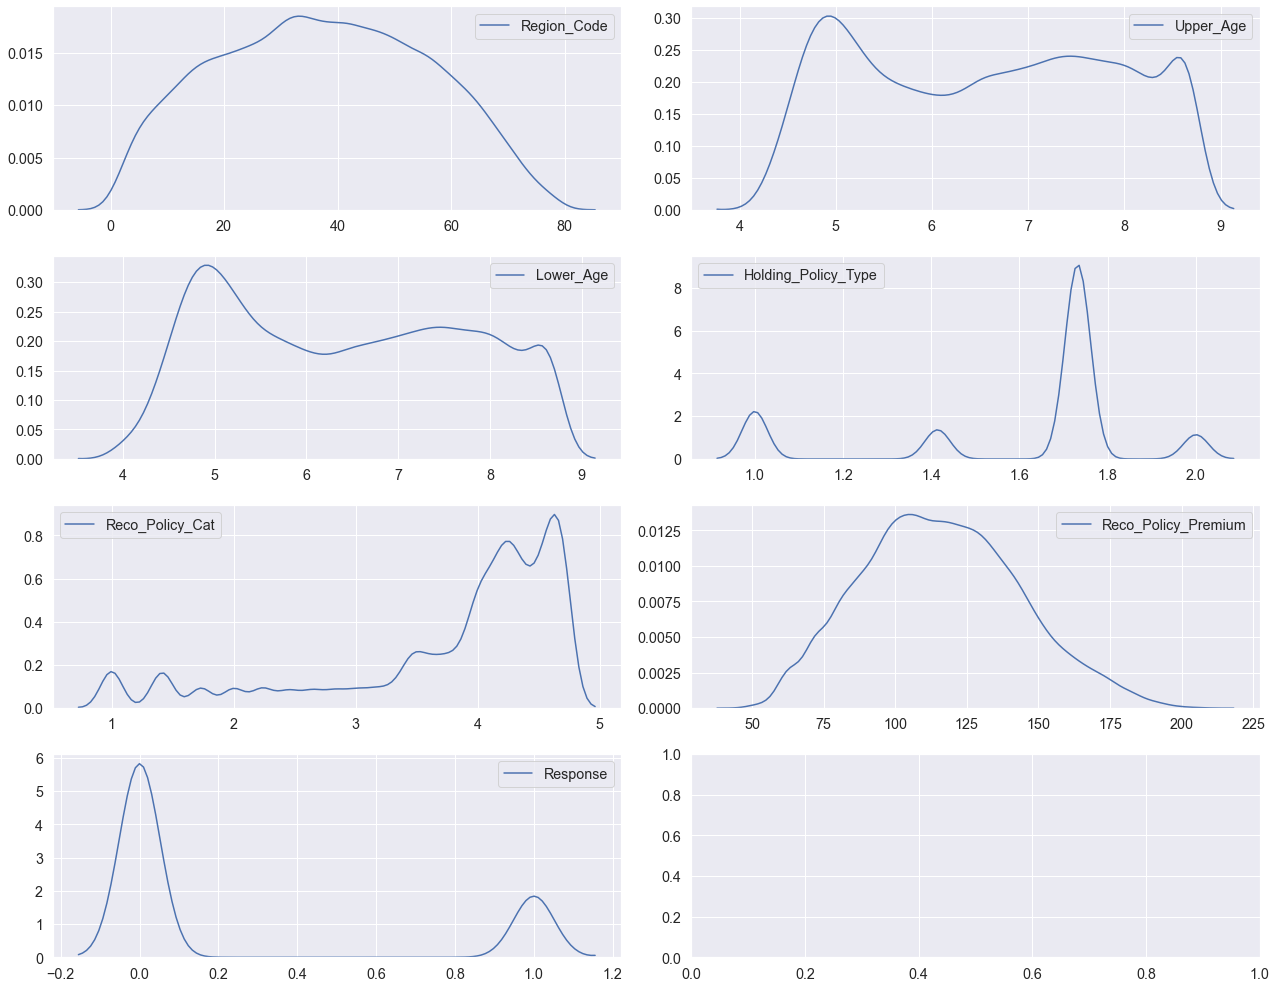

In [178]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(continuous_col):
    plot = sns.kdeplot(data=np.sqrt(x_train[c]), ax=axes[i])
    plt.tight_layout()

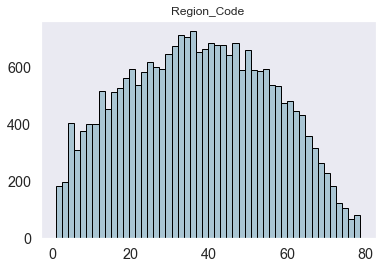

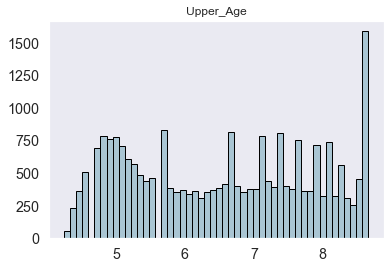

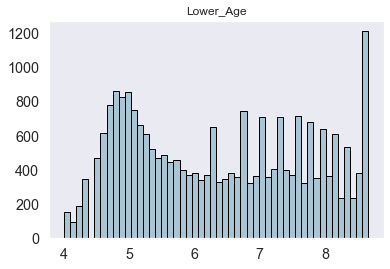

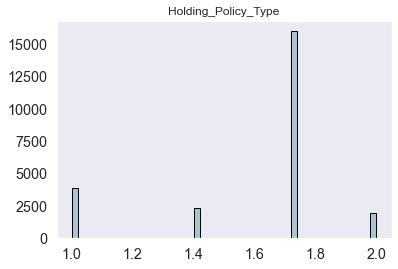

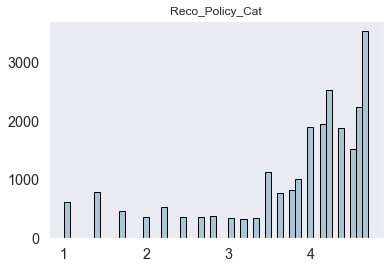

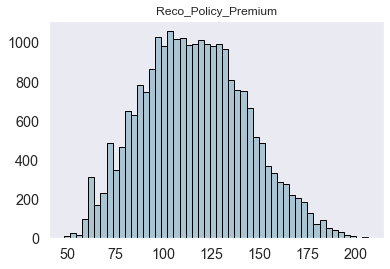

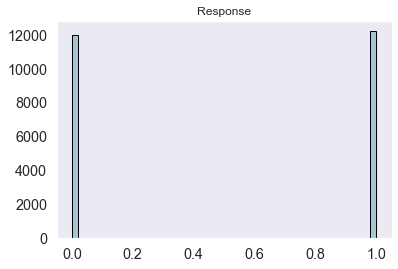

In [32]:
for col in continuous_col:
    fig,ax = plt.subplots()
    np.sqrt(x_train[col]).hist(bins=50,color='#A9C5D3',edgecolor='black',grid=False)
    ax.set_title(col, fontsize=12)

3) Using Log To Remove Skewness

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


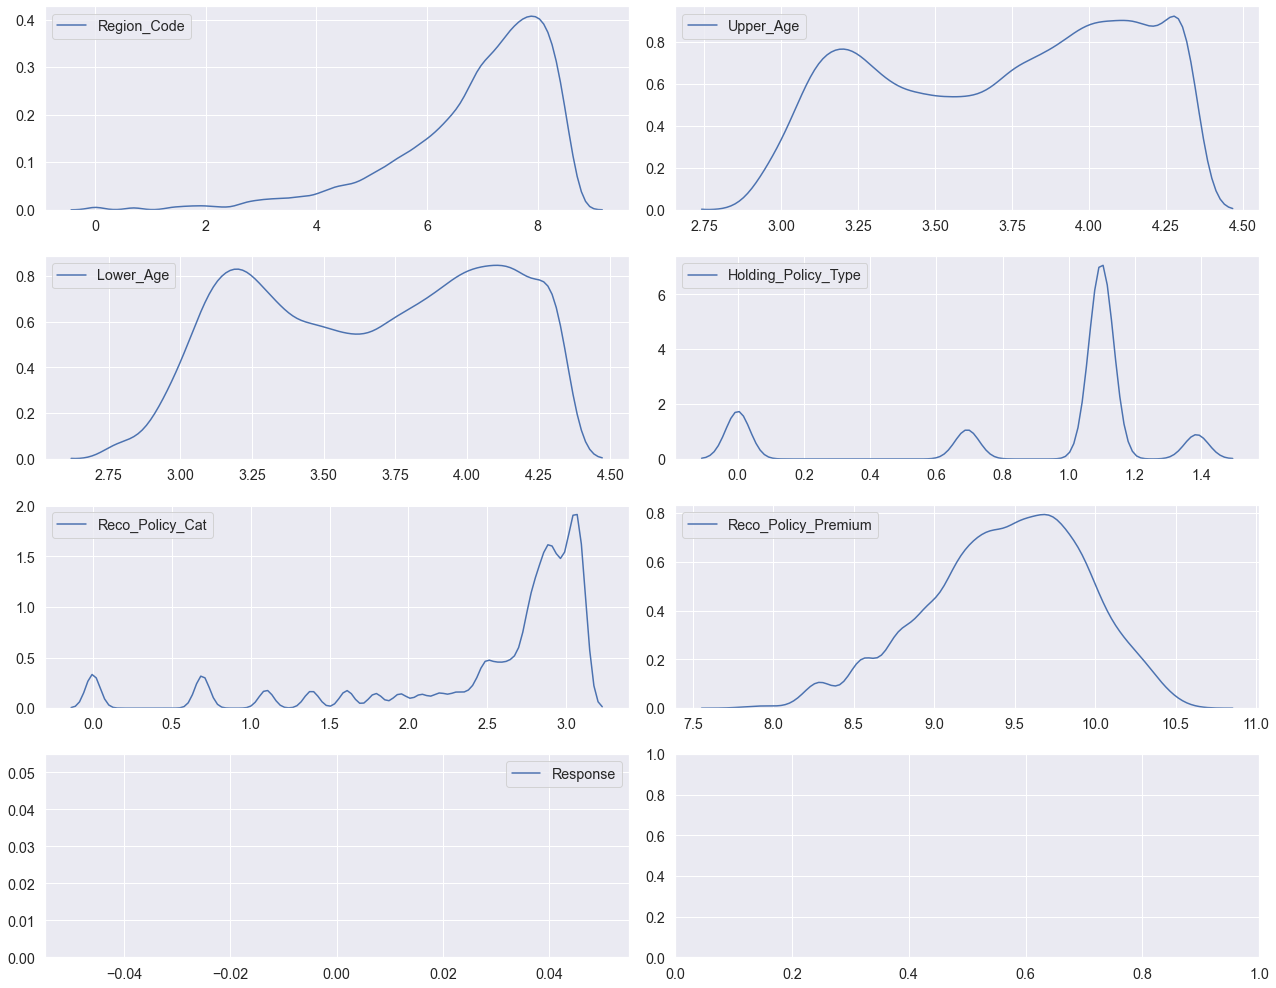

In [179]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(continuous_col):
    plot = sns.kdeplot(data=np.log(x_train[c]), ax=axes[i])
    plt.tight_layout()

#### Removing Skewness Of 2 Features

1) Region Code

In [35]:
x_train["Region_Code"] = np.sqrt(x_train["Region_Code"])
x_test["Region_Code"] = np.sqrt(x_train["Region_Code"])

2) Reco_Policy_Premium

In [36]:
x_train["Reco_Policy_Premium"] = np.sqrt(x_train["Reco_Policy_Premium"])
x_test["Reco_Policy_Premium"] = np.sqrt(x_test["Reco_Policy_Premium"])

# Feature Engineering

1) Holding_Policy_Duration

In [184]:
x_train["Difference"] = x_train["Upper_Age"]-x_train["Lower_Age"]
x_test["Difference"] = x_test["Upper_Age"]-x_test["Lower_Age"]

2) Accomodation_Type & Is_Spouse

In [39]:

# x_train["Accomodation_Spouse"] = np.where((x_train["Accomodation_Type"]=="Rented") & (x_train["Is_Spouse"]=="Yes"),1,0)

# x_test["Accomodation_Spouse"] = np.where((x_test["Accomodation_Type"]=="Rented") & (x_test["Is_Spouse"]=="Yes"),1,0)

# Checking Correlation

In [185]:
numerical_col = x_train.select_dtypes(["float64","int64"]).columns
x_train[numerical_col].corr()

Region_Code  Upper_Age  Lower_Age  Holding_Policy_Type  \
Region_Code             1.000000  -0.005649  -0.005928             0.011599   
Upper_Age              -0.005649   1.000000   0.921392             0.141890   
Lower_Age              -0.005928   0.921392   1.000000             0.118028   
Holding_Policy_Type     0.011599   0.141890   0.118028             1.000000   
Reco_Policy_Cat        -0.065120   0.025257   0.021163             0.079678   
Reco_Policy_Premium    -0.010797   0.792689   0.615739             0.121342   
Response                0.001121   0.002772  -0.002099             0.009297   
Difference              0.000711   0.196978  -0.199526             0.042164   

                     Reco_Policy_Cat  Reco_Policy_Premium  Response  \
Region_Code                -0.065120            -0.010797  0.001121   
Upper_Age                   0.025257             0.792689  0.002772   
Lower_Age                   0.021163             0.615739 -0.002099   
Holding_Policy_Type         0.079678             0.121342  0.009297   
Reco_Policy_Cat             1.000000             0.060989  0.114321   
Reco_Policy_Premium         0.060989             1.000000  0.007943   
Response                    0.114321             0.007943  1.000000   
Difference                  0.010295             0.445343  0.012284   

                     Difference  
Region_Code            0.000711  
Upper_Age              0.196978  
Lower_Age             -0.199526  
Holding_Policy_Type    0.042164  
Reco_Policy_Cat        0.010295  
Reco_Policy_Premium    0.445343  
Response               0.012284  
Difference             1.000000

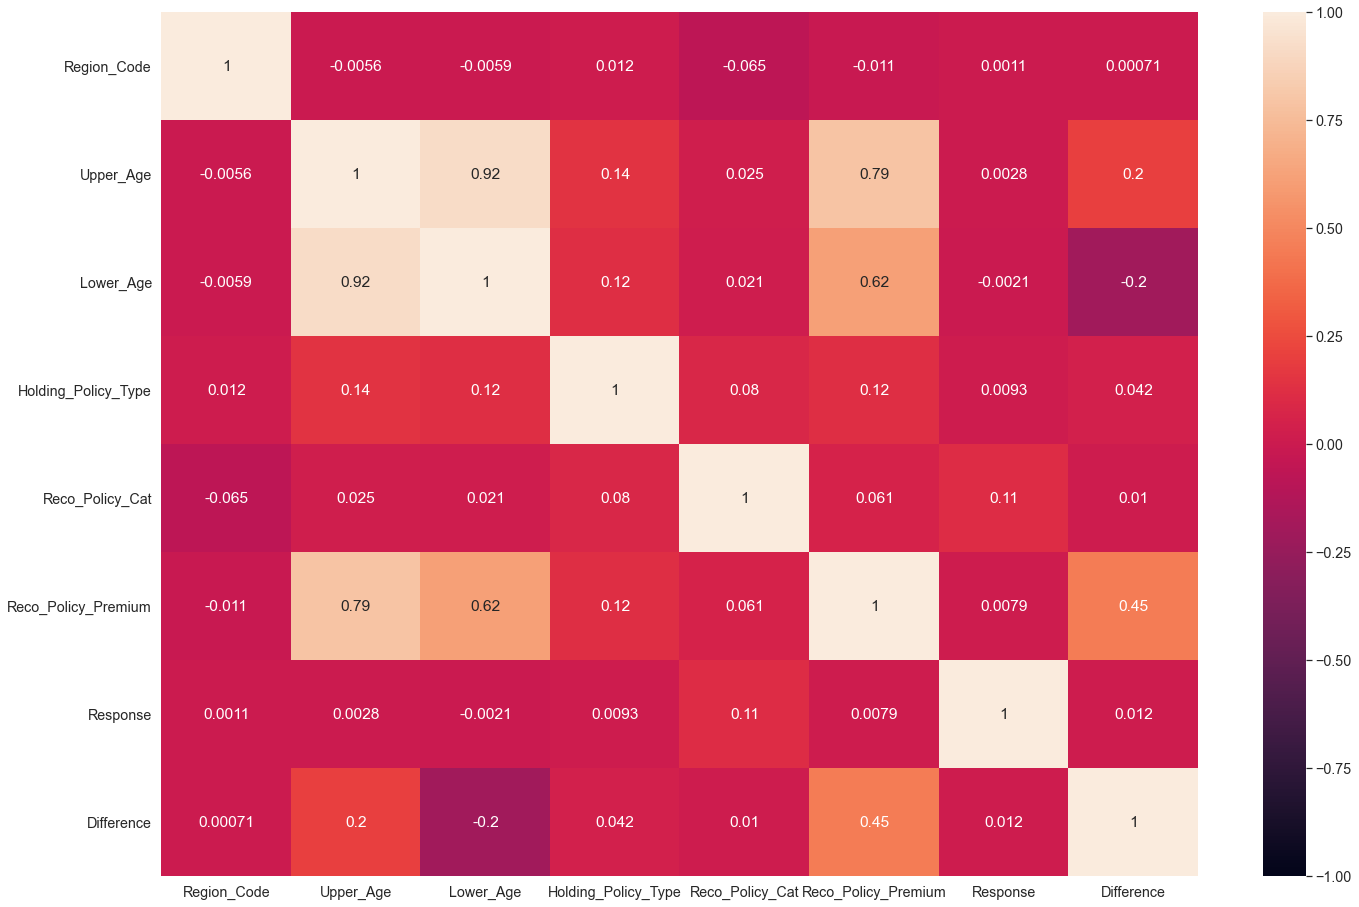

In [188]:
fig = plt.figure(figsize=(18,12))
fig.add_axes([0,0,1,1])

ax = fig.get_axes()[0]

corr_mat = x_train[numerical_col].corr()

sns.heatmap(corr_mat,ax=ax,vmin=-1,vmax=1,annot=True)

plt.show()

### Removing Highly Correated Features

In [43]:
x_train.drop(columns="Upper_Age",inplace=True)
x_test.drop(columns="Upper_Age",inplace=True)

# Encoding

1) Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
x_train

City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Lower_Age  \
5339         C2    32.264532             Owned          Individual         46   
15275        C3    50.378567            Rented          Individual         52   
4973         C1    19.974984             Owned          Individual         26   
7087         C2    32.326460            Rented          Individual         75   
7363         C3    57.749459             Owned               Joint         32   
...         ...          ...               ...                 ...        ...   
50858        C1    22.226111            Rented               Joint         29   
50863        C1    60.868711             Owned          Individual         75   
50868        C1    48.238988             Owned          Individual         75   
50875        C6    15.198684            Rented          Individual         36   
50880        C1     2.000000             Owned               Joint         49   

      Is_Spouse Health Indicator Holding_Policy_Duration  Holding_Policy_Type  \
5339         No               X9                    13.0                  3.0   
15275        No               X4                     6.0                  1.0   
4973         No               X2                     1.0                  1.0   
7087         No               X6                     1.0                  1.0   
7363        Yes               X4                    13.0                  3.0   
...         ...              ...                     ...                  ...   
50858       Yes               X1                    13.0                  3.0   
50863        No               X3                    13.0                  3.0   
50868        No               X3                     9.0                  3.0   
50875        No               X3                     2.0                  1.0   
50880        No               X2                     2.0                  2.0   

       Reco_Policy_Cat  Reco_Policy_Premium  Response  Difference  
5339                22           122.400980         0           0  
15275               16           123.117830         0           0  
4973                12            87.498571         0           0  
7087                11           132.921029         0           0  
7363                13           129.073622         0           3  
...                ...                  ...       ...         ...  
50858               18           155.958969         1          33  
50863               16           133.603892         1           0  
50868               18           148.546289         1           0  
50875               20           116.507510         1           0  
50880               16           167.866614         1          22  

[24209 rows x 13 columns]

In [127]:
lb = LabelEncoder()

#### 2 Unique

In [578]:
# x_train["Accomodation_Type"] = lb.fit_transform(x_train["Accomodation_Type"])
# x_test["Accomodation_Type"] = lb.transform(x_test["Accomodation_Type"])

In [579]:
# x_train["Reco_Insurance_Type"] = lb.fit_transform(x_train["Reco_Insurance_Type"])
# x_test["Reco_Insurance_Type"] = lb.transform(x_test["Reco_Insurance_Type"])

In [580]:
# x_train["Is_Spouse"] = lb.fit_transform(x_train["Is_Spouse"])
# x_test["Is_Spouse"] = lb.transform(x_test["Is_Spouse"])


### More than 2 Unique

In [192]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27209 entries, 5339 to 50880
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                27209 non-null  object 
 1   Region_Code              27209 non-null  float64
 2   Accomodation_Type        27209 non-null  int32  
 3   Reco_Insurance_Type      27209 non-null  int32  
 4   Lower_Age                27209 non-null  int64  
 5   Is_Spouse                27209 non-null  int32  
 6   Health Indicator         27209 non-null  object 
 7   Holding_Policy_Duration  27209 non-null  object 
 8   Holding_Policy_Type      27209 non-null  float64
 9   Reco_Policy_Cat          27209 non-null  int64  
 10  Reco_Policy_Premium      27209 non-null  float64
 11  Response                 27209 non-null  int64  
dtypes: float64(3), int32(3), int64(3), object(3)
memory usage: 3.6+ MB


In [266]:
# x_train["Holding_Policy_Duration"] = x_train["Holding_Policy_Duration"].astype("float64")
# x_test["Holding_Policy_Duration"] = x_test["Holding_Policy_Duration"].astype("float64")

In [272]:
# x_train["City_Code"] = lb.fit_transform(x_train["City_Code"])
# x_test["City_Code"] = lb.transform(x_test["City_Code"])

In [273]:
# x_train["Health Indicator"] = lb.fit_transform(x_train["Health Indicator"])
# x_test["Health Indicator"] = lb.transform(x_test["Health Indicator"])

In [274]:
# x_train

City_Code  Region_Code  Accomodation_Type  Reco_Insurance_Type  \
5339          11         1041                  0                    0   
15275         22         2538                  1                    0   
4973           0          399                  0                    0   
7087          11         1045                  1                    0   
7363          22         3335                  0                    1   
...          ...          ...                ...                  ...   
50858          0          494                  1                    1   
50863          0         3705                  0                    0   
50868          0         2327                  0                    0   
50875         32          231                  1                    0   
50880          0            4                  0                    1   

       Upper_Age  Lower_Age  Is_Spouse  Health Indicator  \
5339          46         46          0                 0   
15275         52         52          0                 4   
4973          26         26          0                 2   
7087          75         75          0                 5   
7363          35         32          1                 4   
...          ...        ...        ...               ...   
50858         62         29          1                 1   
50863         75         75          0                 3   
50868         75         75          0                 3   
50875         36         36          0                 3   
50880         71         49          0                 2   

       Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
5339                       5.0                  3.0               22   
15275                      6.0                  1.0               16   
4973                       1.0                  1.0               12   
7087                       1.0                  1.0               11   
7363                       5.0                  3.0               13   
...                        ...                  ...              ...   
50858                     13.0                  3.0               18   
50863                      5.0                  3.0               16   
50868                      9.0                  3.0               18   
50875                      2.0                  1.0               20   
50880                      2.0                  2.0               16   

       Reco_Policy_Premium  Response  
5339               14982.0         0  
15275              15158.0         0  
4973                7656.0         0  
7087               17668.0         0  
7363               16660.0         0  
...                    ...       ...  
50858              24323.2         1  
50863              17850.0         1  
50868              22066.0         1  
50875              13574.0         1  
50880              28179.2         1  

[27209 rows x 13 columns]

2) One Hot Encoding

In [452]:
# combine = x_train.append(x_test)

In [453]:
# combine["City_Code"].value_counts()

In [454]:
# combine["Health Indicator"].value_counts()/

In [46]:
temp_train =  x_train["City_Code"].value_counts()/x_train.shape[0]
temp_test = x_test["City_Code"].value_counts()/x_test.shape[0]

In [47]:
temp_train1 = x_train["Health Indicator"].value_counts()/x_train.shape[0]
temp_test1 = x_test["Health Indicator"].value_counts()/x_test.shape[0]

In [48]:
temp_train.reset_index()

index  City_Code
0     C1   0.181090
1     C2   0.152381
2     C3   0.095419
3     C4   0.071709
4     C9   0.042298
5     C7   0.037548
6     C8   0.036928
7     C6   0.036350
8    C10   0.031476
9     C5   0.027593
10   C15   0.023215
11   C11   0.021893
12   C16   0.021769
13   C17   0.021562
14   C13   0.020116
15   C19   0.017803
16   C20   0.017390
17   C12   0.016853
18   C18   0.015738
19   C14   0.014003
20   C21   0.012970
21   C23   0.011979
22   C24   0.010657
23   C22   0.009872
24   C26   0.009377
25   C29   0.008220
26   C25   0.007105
27   C33   0.005990
28   C27   0.005824
29   C28   0.005329
30   C32   0.003594
31   C34   0.002644
32   C30   0.001363
33   C35   0.001033
34   C36   0.000661
35   C31   0.000248

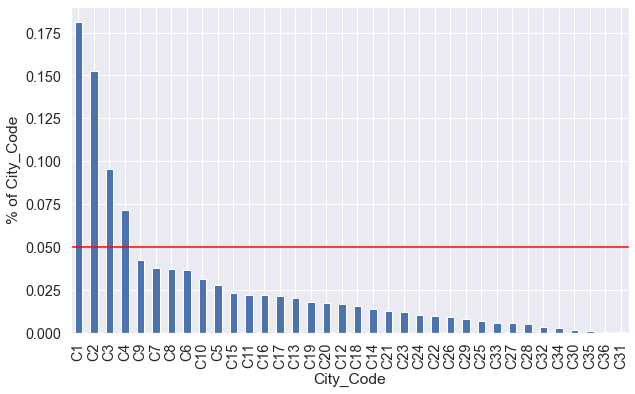

In [49]:
plt.figure(figsize=(10,6))
temp_train.plot.bar()
plt.axhline(y=.05,color='red')
plt.xlabel("City_Code")
plt.ylabel("% of City_Code")
plt.show()

In [51]:
def get_most_time_occuring_response_in_city_code(df,cat,):
    temp = df[cat].value_counts()/df.shape[0]
    temp = temp.reset_index()
    temp.columns = [cat,"% of category"]
    
    median_price = df.groupby([cat])["Response"].median().reset_index()
    
    temp = temp.merge(median_price,on=cat,how="left")
    
    return temp

In [52]:
get_most_time_occuring_response_in_city_code(x_train,"City_Code")

City_Code  % of category  Response
0         C1       0.181090         1
1         C2       0.152381         1
2         C3       0.095419         1
3         C4       0.071709         1
4         C9       0.042298         0
5         C7       0.037548         1
6         C8       0.036928         0
7         C6       0.036350         1
8        C10       0.031476         0
9         C5       0.027593         0
10       C15       0.023215         0
11       C11       0.021893         1
12       C16       0.021769         1
13       C17       0.021562         1
14       C13       0.020116         1
15       C19       0.017803         0
16       C20       0.017390         1
17       C12       0.016853         0
18       C18       0.015738         0
19       C14       0.014003         1
20       C21       0.012970         0
21       C23       0.011979         1
22       C24       0.010657         1
23       C22       0.009872         0
24       C26       0.009377         0
25       C29       0.008220         0
26       C25       0.007105         1
27       C33       0.005990         0
28       C27       0.005824         1
29       C28       0.005329         1
30       C32       0.003594         1
31       C34       0.002644         1
32       C30       0.001363         1
33       C35       0.001033         1
34       C36       0.000661         0
35       C31       0.000248         0

# Grouping of rare occuring labels of city code & Health Indicator

In [581]:
# def rare_labels_grouping(df,cat):
#     temp = df[cat].value_counts()/df.shape[0]
    
#     grouping_dict = {
#       k: 'rare' if k not in temp[temp>=0.05].index else k for k in temp.index
#     }
#     t = df[cat].map(grouping_dict)
#     return t

In [582]:
# rare_labels_grouping(x_train,"City_Code").value_counts()

rare    13636
C1       4890
C2       4111
C3       2605
C4       1967
Name: City_Code, dtype: int64

In [583]:
# x_train["City_Code"] = rare_labels_grouping(x_train,"City_Code")
# x_test["City_Code"] = rare_labels_grouping(x_test,"City_Code")

In [584]:
# x_train["Holding_Policy_Duration"] = rare_labels_grouping(x_train,"Holding_Policy_Duration")
# x_test["Holding_Policy_Duration"] = rare_labels_grouping(x_test,"Holding_Policy_Duration")

In [585]:
# rare_labels_grouping(x_train,"Holding_Policy_Duration").value_counts()

14+     13218
rare     5980
1.0      2316
2.0      2275
3.0      1913
4.0      1507
Name: Holding_Policy_Duration, dtype: int64

2) Health Indicator

In [435]:
# plt.figure(figsize=(10,6))
# temp_train1.plot.bar()
# plt.axhline(y=.05,color='red')
# plt.xlabel("City_Code")
# plt.ylabel("% of City_Code")
# plt.show()

In [436]:
# def rare_labels_grouping(df,cat):
#     temp = df[cat].value_counts()/df.shape[0]
    
#     grouping_dict = {
#       k: 'new_rare' if k not in temp[temp>=0.05].index else k for k in temp.index
#     }
#     t = df[cat].map(grouping_dict)
#     return t

In [586]:
# x_train["Health Indicator"] = rare_labels_grouping(x_train,"Health Indicator")
# x_test["Health Indicator"] = rare_labels_grouping(x_test,"Health Indicator")

In [587]:
# x_train["Health Indicator"].value_counts()

X1      6962
NAN     6223
X2      5554
X3      3605
X4      3039
rare    1826
Name: Health Indicator, dtype: int64

In [200]:
# x_train.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

1) City_Code

In [53]:
x_train = pd.get_dummies(x_train,drop_first=True)
x_test = pd.get_dummies(x_test,drop_first=True)

In [54]:
x_train.shape,x_test.shape

((24209, 67), (21805, 66))

In [55]:
y_train = x_train["Response"]
x_train.drop(columns="Response",inplace=True)

In [56]:
col = x_train.columns

In [57]:
x_train

Region_Code  Lower_Age  Holding_Policy_Type  Reco_Policy_Cat  \
5339     32.264532         46                  3.0               22   
15275    50.378567         52                  1.0               16   
4973     19.974984         26                  1.0               12   
7087     32.326460         75                  1.0               11   
7363     57.749459         32                  3.0               13   
...            ...        ...                  ...              ...   
50858    22.226111         29                  3.0               18   
50863    60.868711         75                  3.0               16   
50868    48.238988         75                  3.0               18   
50875    15.198684         36                  1.0               20   
50880     2.000000         49                  2.0               16   

       Reco_Policy_Premium  Difference  City_Code_C10  City_Code_C11  \
5339            122.400980           0              0              0   
15275           123.117830           0              0              0   
4973             87.498571           0              0              0   
7087            132.921029           0              0              0   
7363            129.073622           3              0              0   
...                    ...         ...            ...            ...   
50858           155.958969          33              0              0   
50863           133.603892           0              0              0   
50868           148.546289           0              0              0   
50875           116.507510           0              0              0   
50880           167.866614          22              0              0   

       City_Code_C12  City_Code_C13  ...  Holding_Policy_Duration_14+  \
5339               0              0  ...                            0   
15275              0              0  ...                            0   
4973               0              0  ...                            0   
7087               0              0  ...                            0   
7363               0              0  ...                            0   
...              ...            ...  ...                          ...   
50858              0              0  ...                            0   
50863              0              0  ...                            0   
50868              0              0  ...                            0   
50875              0              0  ...                            0   
50880              0              0  ...                            0   

       Holding_Policy_Duration_14.0  Holding_Policy_Duration_2.0  \
5339                              0                            0   
15275                             0                            0   
4973                              0                            0   
7087                              0                            0   
7363                              0                            0   
...                             ...                          ...   
50858                             0                            0   
50863                             0                            0   
50868                             0                            0   
50875                             0                            1   
50880                             0                            1   

       Holding_Policy_Duration_3.0  Holding_Policy_Duration_4.0  \
5339                             0                            0   
15275                            0                            0   
4973                             0                            0   
7087                             0                            0   
7363                             0                            0   
...                            ...                          ...   
50858                            0                            0   
50863                            0                         

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [600]:
sc  = MinMaxScaler()

In [601]:


# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

# x_train["Region_Code"] = sc.fit_transform(x_train["Region_Code"].values.reshape(-1,1))
# x_test["Region_Code"] = sc.transform(x_test["Region_Code"].values.reshape(-1,1))

# # x_train["Upper_Age"] = sc.fit_transform(x_train["Upper_Age"].values.reshape(-1,1))
# # x_test["Upper_Age"] = sc.transform(x_test["Upper_Age"].values.reshape(-1,1))

# x_train["Lower_Age"] = sc.fit_transform(x_train["Lower_Age"].values.reshape(-1,1))
# x_test["Lower_Age"] = sc.transform(x_test["Lower_Age"].values.reshape(-1,1))

# x_train["Holding_Policy_Duration"] = sc.fit_transform(x_train["Holding_Policy_Duration"].values.reshape(-1,1))
# x_test["Holding_Policy_Duration"] = sc.transform(x_test["Holding_Policy_Duration"].values.reshape(-1,1))

# x_train["Holding_Policy_Type"] = sc.fit_transform(x_train["Holding_Policy_Type"].values.reshape(-1,1))
# x_test["Holding_Policy_Type"] = sc.transform(x_test["Holding_Policy_Type"].values.reshape(-1,1))

# x_train["Reco_Policy_Cat"] = sc.fit_transform(x_train["Reco_Policy_Cat"].values.reshape(-1,1))
# x_test["Reco_Policy_Cat"] = sc.transform(x_test["Reco_Policy_Cat"].values.reshape(-1,1))

# x_train["Reco_Policy_Premium"] = sc.fit_transform(x_train["Reco_Policy_Premium"].values.reshape(-1,1))
# x_test["Reco_Policy_Premium"] = sc.transform(x_test["Reco_Policy_Premium"].values.reshape(-1,1))

# x_train

# Smote Use Case For Sampling

In [764]:
# # Sampling Data Using Smote

# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()

# x_train,y_train = oversample.fit_sample(x_train,y_train)

# x_train.shape,y_train.shape

# from sklearn.metrics import roc_auc_score

# Model Building

1) Logistic Regression


In [765]:
from sklearn.linear_model import LogisticRegression

In [766]:
lg = LogisticRegression()

In [767]:
lg.fit(x_train,y_train)

LogisticRegression()

In [768]:
lg.score(x_train,y_train)

0.5485684883678195

In [769]:
y_train_lg = lg.predict(x_train)

In [770]:
roc_auc_score(y_train,y_train_lg)

0.5250493761432823

In [299]:
y_lg = lg.predict_proba(x_test)

In [638]:
y_lg = pd.DataFrame(y_lg,columns=["0","1"])

In [639]:
y_lg = y_lg["1"]

In [640]:
y_lg = np.array(y_lg)

In [641]:
y_lg = y_lg.reshape(-1,1)

In [642]:
y_prediction = np.hstack([sample,y_lg])

In [643]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("lg.csv",index=False)

# Use Of Hyper OPT

In [145]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from hyperopt import Trials
from sklearn.model_selection import cross_val_score

In [602]:
x_train

array([[0.40236473, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.63548668, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.2442021 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60795098, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.18273262, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01286969, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

# XG Boost

In [64]:
from xgboost import XGBClassifier

In [65]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import roc_auc_score,make_scorer
from sklearn.model_selection import cross_val_score
scoring_function = make_scorer(roc_auc_score)

In [481]:
# 
# # parameters = {"max_depth":[5,10,15,20,25,30],
# #              "n_estimators":[100,150,200,250,300,350,400],
# #              "num_leaves":[4,5,6,7,8,9,10],
# #              "reg_lambda":[0.2,0.3,0.4,0.5,0.6,0.7,0.8]}

# parameters = {"max_depth":[5,10,15,20,25,30],
#              "n_estimators":[200,300,400,500,600,700,800]}

# gs_xg = GridSearchCV(xg,param_grid=parameters,scoring=scoring_function,cv=10)

In [ ]:
space_xgb = {
    'n_estimators': hp.choice('n_estimators', [100,200,300,400,500,600,700]),
    "max_depth":hp.choice("max_depth", [1, 5,10,12,14]),
#     "num_leaves":hp.choice("num_leaves",[16,32,64,128,256,512,50]),
    "criterion": hp.choice("criterion", ["gini", "entropy"])
}

scoring_function = make_scorer(roc_auc_score)

def hyperparameters_xgb(params):
    xgb = XGBClassifier(**params)
    acc = cross_val_score(xgb, x_train, y_train,scoring=scoring_function).mean()
    return {"loss": -acc, "status": STATUS_OK}


trials = Trials()

best_xgb = fmin(
    fn=hyperparameters_xgb,
    space = space_xgb, 
    algo=tpe.suggest, 
    max_evals=5, 
    trials=trials
)

best_xgb

In [73]:
xg = XGBClassifier(max_depth=10,n_estimators=400,criterion="gini")
# reg_alpha
# reg_lambda

In [70]:
scores = cross_val_score(xg, x_train, y_train, cv=5,scoring=scoring_function)

[21:49:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:49:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:49:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bi

In [72]:
scores

array([0.58349048, 0.59806665, 0.59144298, 0.58716472, 0.57569994])

In [74]:
xg.fit(x_train,y_train)


[21:50:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
xg.score(x_train,y_train)

0.9990912470568797

In [76]:
y_xg = xg.predict_proba(x_test)

In [77]:
y_xg = pd.DataFrame(y_xg,columns=["0","1"])

In [78]:
y_xg = y_xg["1"]

In [79]:
y_xg = np.array(y_xg)

In [80]:
y_xg = y_xg.reshape(-1,1)

<AxesSubplot:>

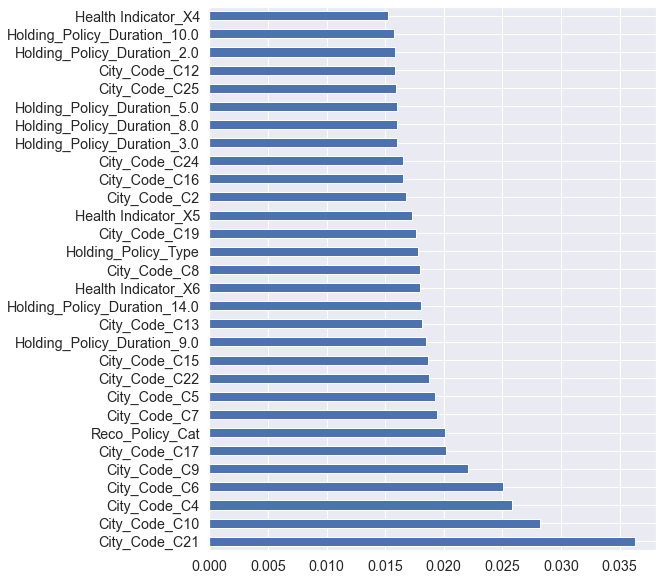

In [81]:
feat_imp = pd.Series(xg.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [82]:
y_prediction = np.hstack([sample,y_xg])

In [83]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("xgb.csv",index=False)

# LIght GBM

In [89]:
x_train

Region_Code  Lower_Age  Holding_Policy_Type  Reco_Policy_Cat  \
5339     32.264532         46                  3.0               22   
15275    50.378567         52                  1.0               16   
4973     19.974984         26                  1.0               12   
7087     32.326460         75                  1.0               11   
7363     57.749459         32                  3.0               13   
...            ...        ...                  ...              ...   
50858    22.226111         29                  3.0               18   
50863    60.868711         75                  3.0               16   
50868    48.238988         75                  3.0               18   
50875    15.198684         36                  1.0               20   
50880     2.000000         49                  2.0               16   

       Reco_Policy_Premium  Difference  City_Code_C10  City_Code_C11  \
5339            122.400980           0              0              0   
15275           123.117830           0              0              0   
4973             87.498571           0              0              0   
7087            132.921029           0              0              0   
7363            129.073622           3              0              0   
...                    ...         ...            ...            ...   
50858           155.958969          33              0              0   
50863           133.603892           0              0              0   
50868           148.546289           0              0              0   
50875           116.507510           0              0              0   
50880           167.866614          22              0              0   

       City_Code_C12  City_Code_C13  ...  Holding_Policy_Duration_14+  \
5339               0              0  ...                            0   
15275              0              0  ...                            0   
4973               0              0  ...                            0   
7087               0              0  ...                            0   
7363               0              0  ...                            0   
...              ...            ...  ...                          ...   
50858              0              0  ...                            0   
50863              0              0  ...                            0   
50868              0              0  ...                            0   
50875              0              0  ...                            0   
50880              0              0  ...                            0   

       Holding_Policy_Duration_14.0  Holding_Policy_Duration_2.0  \
5339                              0                            0   
15275                             0                            0   
4973                              0                            0   
7087                              0                            0   
7363                              0                            0   
...                             ...                          ...   
50858                             0                            0   
50863                             0                            0   
50868                             0                            0   
50875                             0                            1   
50880                             0                            1   

       Holding_Policy_Duration_3.0  Holding_Policy_Duration_4.0  \
5339                             0                            0   
15275                            0                            0   
4973                             0                            0   
7087                             0                            0   
7363                             0                            0   
...                            ...                          ...   
50858                            0                            0   
50863                            0                         

In [84]:
from lightgbm import LGBMClassifier

In [85]:
scoring_function = make_scorer(roc_auc_score)

In [154]:
# parameters = {"max_depth":[5,10,15,20,25,30],
#              "n_estimators":[200,300,400,500,600,700,800]}
# gs_lg = GridSearchCV(lgb,param_grid=parameters,scoring=scoring_function,cv=10)

In [795]:
space_lgb = {
    'n_estimators': hp.choice('n_estimators', [100,200,300,400,500,600,700,800]),
    "max_depth":hp.choice("max_depth", [1,5,8,10,12,14]),
    "num_leaves":hp.choice("num_leaves",[16,32,64,128,256,512,50]),
    "criterion": hp.choice("criterion", ["gini", "entropy"])
}

def hyperparameters_lgb(params):
    lgb = LGBMClassifier(**params)
    acc = cross_val_score(lgb,x_train,y_train,scoring=scoring_function).mean()
    return {"loss":-acc,"status":STATUS_OK}

trials = Trials()

best_lgb = fmin(fn = hyperparameters_lgb,space=space_lgb,algo=tpe.suggest,max_evals=10,trials=trials)

best_lgb

In [603]:
x_train = pd.DataFrame(x_train,columns=col)
x_test = pd.DataFrame(x_test,columns=col)

In [604]:
x_train

Region_Code  Accomodation_Type  Reco_Insurance_Type  Lower_Age  \
0         0.402365                0.0                  0.0   0.508475   
1         0.635487                1.0                  0.0   0.610169   
2         0.244202                0.0                  0.0   0.169492   
3         0.403162                1.0                  0.0   1.000000   
4         0.730348                0.0                  1.0   0.271186   
...            ...                ...                  ...        ...   
27204     0.273173                1.0                  1.0   0.220339   
27205     0.770492                0.0                  0.0   1.000000   
27206     0.607951                0.0                  0.0   1.000000   
27207     0.182733                1.0                  0.0   0.338983   
27208     0.012870                0.0                  1.0   0.559322   

       Is_Spouse  Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  \
0            0.0             0.666667         1.000000             0.468713   
1            0.0             0.000000         0.714286             0.473229   
2            0.0             0.000000         0.523810             0.248834   
3            0.0             0.000000         0.476190             0.534987   
4            1.0             0.666667         0.571429             0.510749   
...          ...                  ...              ...                  ...   
27204        1.0             0.666667         0.809524             0.680122   
27205        0.0             0.666667         0.714286             0.539289   
27206        0.0             0.666667         0.809524             0.633424   
27207        0.0             0.000000         0.904762             0.431585   
27208        0.0             0.333333         0.714286             0.755138   

       City_Code_C2  City_Code_C3  ...  Health Indicator_X1  \
0               1.0           0.0  ...                  0.0   
1               0.0           1.0  ...                  0.0   
2               0.0           0.0  ...                  0.0   
3               1.0           0.0  ...                  0.0   
4               0.0           1.0  ...                  0.0   
...             ...           ...  ...                  ...   
27204           0.0           0.0  ...                  1.0   
27205           0.0           0.0  ...                  0.0   
27206           0.0           0.0  ...                  0.0   
27207           0.0           0.0  ...                  0.0   
27208           0.0           0.0  ...                  0.0   

       Health Indicator_X2  Health Indicator_X3  Health Indicator_X4  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  1.0   
2                      1.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  1.0   
...                    ...                  ...                  ...   
27204                  0.0                  0.0                  0.0   
27205                  0.0                  1.0                  0.0   
27206                  0.0                  1.0                  0.0   
27207                  0.0                  1.0                  0.0   
27208                  1.0                  0.0                  0.0   

       Health Indicator_rare  Holding_Policy_Duration_14+  \
0                        0.0                          1.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        1.0                          0.0   
4                        0.0                          1.0   
...                      ...                          ...   
27204                    0.0                          0.0   
27205                    0.0                          1.0   
27206     

In [136]:
lgb = LGBMClassifier(max_depth=8,reg_alpha=0.3,num_leaves=32,reg_lambda=0.5,n_estimators=400,random_state=42)

In [137]:
scores = cross_val_score(lgb, x_train, y_train, cv=5,scoring=scoring_function)

In [138]:
scores

array([0.59860975, 0.61954392, 0.5977114 , 0.59869574, 0.59152115])

In [139]:
lgb.fit(x_train,y_train)

LGBMClassifier(max_depth=8, n_estimators=400, num_leaves=32, random_state=42,
               reg_alpha=0.3, reg_lambda=0.5)

In [140]:
y_pred_lg = lgb.predict(x_train)

In [141]:
roc_auc_score(y_pred_lg,y_train)

0.8032663153444246

In [142]:
np.sum(y_pred_lg==y_train)/x_train.shape[0]*100

80.11896402164484

In [143]:
lgb.score(x_train,y_train)

0.8011896402164485

In [144]:
y_lgb = lgb.predict_proba(x_test)

In [145]:
y_lgb

array([[0.17884628, 0.82115372],
       [0.35533216, 0.64466784],
       [0.52316046, 0.47683954],
       ...,
       [0.99451069, 0.00548931],
       [0.29778349, 0.70221651],
       [0.92739363, 0.07260637]])

In [146]:
y_lgb = pd.DataFrame(y_lgb,columns=["0","1"])

In [147]:
y_lgb = y_lgb["1"]

In [148]:
y_lgb = np.array(y_lgb)

In [149]:
y_lgb = y_lgb.reshape(-1,1)

<AxesSubplot:>

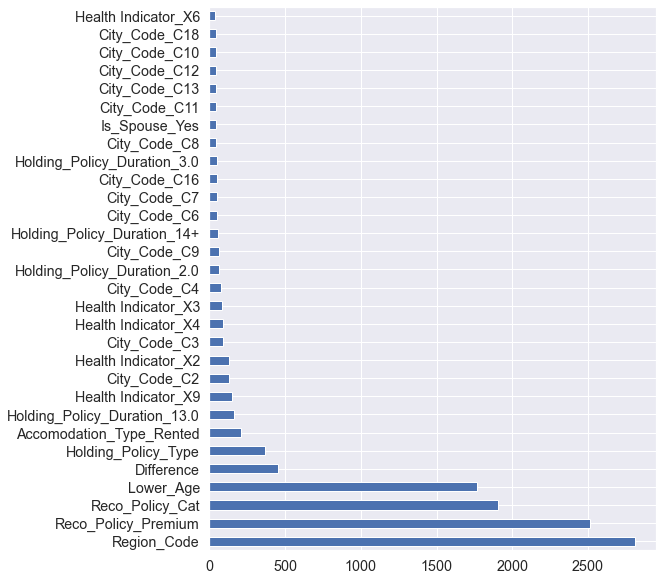

In [150]:
feat_imp = pd.Series(lgb.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [151]:
y_prediction = np.hstack([sample,y_lgb])

In [152]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("lgb.csv",index=False)

# Catboost

In [113]:
from catboost import CatBoostClassifier

In [114]:
scoring_function = make_scorer(roc_auc_score)

In [636]:
space_cb = {
    'n_estimators': hp.choice('n_estimators', [100,200,300,400,500,600,700,800]),
    "max_depth":hp.choice("max_depth", [1,3, 5,10,12,14]),
#     "num_leaves":hp.choice("num_leaves",[16,32,64,128,256,512,50]),
#     "criterion": hp.choice("criterion", ["gini", "entropy"])
}

def hyperparameters_cb(params):
    cb = CatBoostClassifier(**params)
    acc = cross_val_score(cb, x_train, y_train,scoring=scoring_function).mean()
    return {"loss": -acc, "status": STATUS_OK}

trials = Trials()

best_cb = fmin(
    fn=hyperparameters_cb,
    space = space_cb, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

best_cb

In [ ]:
# parameters = {"depth":[5,10,15,20,25,30],
#              "n_estimators":[200,300,400,500,600,700,800]}
# gs_CB = GridSearchCV(CB,param_grid=parameters,scoring=scoring_function,cv=10)

In [116]:
CB = CatBoostClassifier(depth = 6,n_estimators=400)
# l2_leaf_reg

In [117]:
scores = cross_val_score(CB, x_train, y_train, cv=5,scoring=scoring_function)

Learning rate set to 0.08461
0:	learn: 0.6877910	total: 132ms	remaining: 52.6s
1:	learn: 0.6840892	total: 142ms	remaining: 28.3s
2:	learn: 0.6796557	total: 151ms	remaining: 20s
3:	learn: 0.6764569	total: 160ms	remaining: 15.8s
4:	learn: 0.6745715	total: 169ms	remaining: 13.3s
5:	learn: 0.6729970	total: 177ms	remaining: 11.6s
6:	learn: 0.6714396	total: 186ms	remaining: 10.5s
7:	learn: 0.6705351	total: 195ms	remaining: 9.56s
8:	learn: 0.6694110	total: 204ms	remaining: 8.86s
9:	learn: 0.6679749	total: 213ms	remaining: 8.3s
10:	learn: 0.6668406	total: 221ms	remaining: 7.82s
11:	learn: 0.6663196	total: 230ms	remaining: 7.43s
12:	learn: 0.6654278	total: 239ms	remaining: 7.12s
13:	learn: 0.6648739	total: 247ms	remaining: 6.81s
14:	learn: 0.6638984	total: 256ms	remaining: 6.56s
15:	learn: 0.6628208	total: 264ms	remaining: 6.34s
16:	learn: 0.6619220	total: 274ms	remaining: 6.16s
17:	learn: 0.6613525	total: 282ms	remaining: 5.99s
18:	learn: 0.6605470	total: 291ms	remaining: 5.83s
19:	learn: 0.65

177:	learn: 0.6153066	total: 1.75s	remaining: 2.19s
178:	learn: 0.6149725	total: 1.77s	remaining: 2.19s
179:	learn: 0.6146476	total: 1.8s	remaining: 2.21s
180:	learn: 0.6143689	total: 1.82s	remaining: 2.21s
181:	learn: 0.6141649	total: 1.84s	remaining: 2.21s
182:	learn: 0.6139687	total: 1.86s	remaining: 2.21s
183:	learn: 0.6137324	total: 1.88s	remaining: 2.21s
184:	learn: 0.6134273	total: 1.9s	remaining: 2.2s
185:	learn: 0.6132107	total: 1.92s	remaining: 2.2s
186:	learn: 0.6130160	total: 1.94s	remaining: 2.2s
187:	learn: 0.6127189	total: 1.96s	remaining: 2.21s
188:	learn: 0.6125245	total: 1.98s	remaining: 2.21s
189:	learn: 0.6121859	total: 2s	remaining: 2.21s
190:	learn: 0.6119962	total: 2.02s	remaining: 2.21s
191:	learn: 0.6116617	total: 2.04s	remaining: 2.21s
192:	learn: 0.6115246	total: 2.06s	remaining: 2.21s
193:	learn: 0.6113207	total: 2.08s	remaining: 2.2s
194:	learn: 0.6110437	total: 2.09s	remaining: 2.2s
195:	learn: 0.6107528	total: 2.11s	remaining: 2.2s
196:	learn: 0.6105148	t

350:	learn: 0.5794610	total: 4.25s	remaining: 594ms
351:	learn: 0.5793117	total: 4.26s	remaining: 582ms
352:	learn: 0.5791558	total: 4.28s	remaining: 569ms
353:	learn: 0.5789086	total: 4.29s	remaining: 557ms
354:	learn: 0.5787654	total: 4.3s	remaining: 545ms
355:	learn: 0.5786057	total: 4.31s	remaining: 533ms
356:	learn: 0.5784041	total: 4.32s	remaining: 521ms
357:	learn: 0.5780804	total: 4.34s	remaining: 509ms
358:	learn: 0.5778856	total: 4.35s	remaining: 497ms
359:	learn: 0.5777506	total: 4.36s	remaining: 485ms
360:	learn: 0.5776646	total: 4.38s	remaining: 473ms
361:	learn: 0.5775896	total: 4.39s	remaining: 461ms
362:	learn: 0.5774605	total: 4.4s	remaining: 448ms
363:	learn: 0.5772556	total: 4.41s	remaining: 436ms
364:	learn: 0.5771274	total: 4.42s	remaining: 423ms
365:	learn: 0.5769331	total: 4.42s	remaining: 411ms
366:	learn: 0.5767685	total: 4.43s	remaining: 399ms
367:	learn: 0.5765332	total: 4.44s	remaining: 386ms
368:	learn: 0.5763228	total: 4.45s	remaining: 374ms
369:	learn: 0.

118:	learn: 0.6314434	total: 1.27s	remaining: 2.99s
119:	learn: 0.6312573	total: 1.29s	remaining: 3s
120:	learn: 0.6310591	total: 1.31s	remaining: 3.02s
121:	learn: 0.6307873	total: 1.33s	remaining: 3.03s
122:	learn: 0.6305995	total: 1.35s	remaining: 3.04s
123:	learn: 0.6304234	total: 1.37s	remaining: 3.04s
124:	learn: 0.6301293	total: 1.39s	remaining: 3.05s
125:	learn: 0.6298311	total: 1.4s	remaining: 3.05s
126:	learn: 0.6296117	total: 1.42s	remaining: 3.06s
127:	learn: 0.6291219	total: 1.44s	remaining: 3.07s
128:	learn: 0.6287962	total: 1.47s	remaining: 3.08s
129:	learn: 0.6285303	total: 1.49s	remaining: 3.08s
130:	learn: 0.6283516	total: 1.5s	remaining: 3.09s
131:	learn: 0.6280293	total: 1.52s	remaining: 3.09s
132:	learn: 0.6276507	total: 1.54s	remaining: 3.09s
133:	learn: 0.6273132	total: 1.56s	remaining: 3.1s
134:	learn: 0.6270416	total: 1.58s	remaining: 3.1s
135:	learn: 0.6269581	total: 1.59s	remaining: 3.1s
136:	learn: 0.6266794	total: 1.61s	remaining: 3.1s
137:	learn: 0.6265180

296:	learn: 0.5901979	total: 3.8s	remaining: 1.32s
297:	learn: 0.5899236	total: 3.81s	remaining: 1.3s
298:	learn: 0.5897093	total: 3.82s	remaining: 1.29s
299:	learn: 0.5894737	total: 3.83s	remaining: 1.28s
300:	learn: 0.5893049	total: 3.84s	remaining: 1.26s
301:	learn: 0.5891739	total: 3.85s	remaining: 1.25s
302:	learn: 0.5890662	total: 3.87s	remaining: 1.24s
303:	learn: 0.5889031	total: 3.89s	remaining: 1.23s
304:	learn: 0.5887566	total: 3.91s	remaining: 1.22s
305:	learn: 0.5885830	total: 3.93s	remaining: 1.21s
306:	learn: 0.5883661	total: 3.95s	remaining: 1.2s
307:	learn: 0.5881978	total: 3.97s	remaining: 1.19s
308:	learn: 0.5879777	total: 3.99s	remaining: 1.18s
309:	learn: 0.5877551	total: 4.01s	remaining: 1.17s
310:	learn: 0.5875634	total: 4.03s	remaining: 1.15s
311:	learn: 0.5873111	total: 4.05s	remaining: 1.14s
312:	learn: 0.5871710	total: 4.07s	remaining: 1.13s
313:	learn: 0.5870305	total: 4.09s	remaining: 1.12s
314:	learn: 0.5868343	total: 4.12s	remaining: 1.11s
315:	learn: 0.5

56:	learn: 0.6470118	total: 518ms	remaining: 3.12s
57:	learn: 0.6468396	total: 527ms	remaining: 3.11s
58:	learn: 0.6467034	total: 540ms	remaining: 3.12s
59:	learn: 0.6465657	total: 549ms	remaining: 3.11s
60:	learn: 0.6462618	total: 558ms	remaining: 3.1s
61:	learn: 0.6459785	total: 566ms	remaining: 3.09s
62:	learn: 0.6457297	total: 575ms	remaining: 3.08s
63:	learn: 0.6453611	total: 584ms	remaining: 3.07s
64:	learn: 0.6451023	total: 593ms	remaining: 3.05s
65:	learn: 0.6447008	total: 602ms	remaining: 3.04s
66:	learn: 0.6443945	total: 611ms	remaining: 3.04s
67:	learn: 0.6440344	total: 620ms	remaining: 3.03s
68:	learn: 0.6437563	total: 633ms	remaining: 3.04s
69:	learn: 0.6433952	total: 643ms	remaining: 3.03s
70:	learn: 0.6432547	total: 652ms	remaining: 3.02s
71:	learn: 0.6430135	total: 662ms	remaining: 3.01s
72:	learn: 0.6428529	total: 670ms	remaining: 3s
73:	learn: 0.6423578	total: 679ms	remaining: 2.99s
74:	learn: 0.6419850	total: 688ms	remaining: 2.98s
75:	learn: 0.6417570	total: 700ms	r

230:	learn: 0.6032869	total: 3.08s	remaining: 2.25s
231:	learn: 0.6028766	total: 3.08s	remaining: 2.23s
232:	learn: 0.6026779	total: 3.09s	remaining: 2.22s
233:	learn: 0.6025001	total: 3.1s	remaining: 2.2s
234:	learn: 0.6022389	total: 3.11s	remaining: 2.18s
235:	learn: 0.6020357	total: 3.12s	remaining: 2.17s
236:	learn: 0.6017905	total: 3.13s	remaining: 2.15s
237:	learn: 0.6015220	total: 3.14s	remaining: 2.13s
238:	learn: 0.6013445	total: 3.15s	remaining: 2.12s
239:	learn: 0.6011593	total: 3.15s	remaining: 2.1s
240:	learn: 0.6009026	total: 3.16s	remaining: 2.09s
241:	learn: 0.6006648	total: 3.17s	remaining: 2.07s
242:	learn: 0.6003582	total: 3.18s	remaining: 2.05s
243:	learn: 0.6002716	total: 3.19s	remaining: 2.04s
244:	learn: 0.6000393	total: 3.2s	remaining: 2.02s
245:	learn: 0.5998073	total: 3.21s	remaining: 2.01s
246:	learn: 0.5994881	total: 3.22s	remaining: 1.99s
247:	learn: 0.5992291	total: 3.22s	remaining: 1.98s
248:	learn: 0.5990294	total: 3.23s	remaining: 1.96s
249:	learn: 0.59

397:	learn: 0.5708275	total: 5.5s	remaining: 27.7ms
398:	learn: 0.5706570	total: 5.51s	remaining: 13.8ms
399:	learn: 0.5704949	total: 5.53s	remaining: 0us
Learning rate set to 0.08461
0:	learn: 0.6880835	total: 11.8ms	remaining: 4.71s
1:	learn: 0.6846024	total: 23.2ms	remaining: 4.61s
2:	learn: 0.6812016	total: 32.9ms	remaining: 4.36s
3:	learn: 0.6792388	total: 43.4ms	remaining: 4.3s
4:	learn: 0.6772156	total: 52.8ms	remaining: 4.17s
5:	learn: 0.6748354	total: 65.3ms	remaining: 4.29s
6:	learn: 0.6731526	total: 75.1ms	remaining: 4.21s
7:	learn: 0.6721940	total: 83.1ms	remaining: 4.07s
8:	learn: 0.6714412	total: 93.3ms	remaining: 4.05s
9:	learn: 0.6696614	total: 103ms	remaining: 4.01s
10:	learn: 0.6686159	total: 113ms	remaining: 3.98s
11:	learn: 0.6675548	total: 122ms	remaining: 3.96s
12:	learn: 0.6667581	total: 131ms	remaining: 3.91s
13:	learn: 0.6661710	total: 140ms	remaining: 3.87s
14:	learn: 0.6652236	total: 149ms	remaining: 3.83s
15:	learn: 0.6642639	total: 159ms	remaining: 3.81s
16

163:	learn: 0.6197782	total: 2.2s	remaining: 3.16s
164:	learn: 0.6196704	total: 2.22s	remaining: 3.16s
165:	learn: 0.6195198	total: 2.24s	remaining: 3.16s
166:	learn: 0.6194150	total: 2.27s	remaining: 3.17s
167:	learn: 0.6190801	total: 2.29s	remaining: 3.16s
168:	learn: 0.6188621	total: 2.31s	remaining: 3.16s
169:	learn: 0.6186456	total: 2.34s	remaining: 3.17s
170:	learn: 0.6183612	total: 2.36s	remaining: 3.17s
171:	learn: 0.6180321	total: 2.39s	remaining: 3.16s
172:	learn: 0.6178571	total: 2.41s	remaining: 3.16s
173:	learn: 0.6176191	total: 2.43s	remaining: 3.16s
174:	learn: 0.6174462	total: 2.45s	remaining: 3.15s
175:	learn: 0.6172539	total: 2.48s	remaining: 3.15s
176:	learn: 0.6169697	total: 2.5s	remaining: 3.15s
177:	learn: 0.6168016	total: 2.52s	remaining: 3.14s
178:	learn: 0.6164420	total: 2.54s	remaining: 3.14s
179:	learn: 0.6162140	total: 2.56s	remaining: 3.13s
180:	learn: 0.6159105	total: 2.59s	remaining: 3.13s
181:	learn: 0.6156467	total: 2.61s	remaining: 3.13s
182:	learn: 0.

329:	learn: 0.5838225	total: 4.17s	remaining: 884ms
330:	learn: 0.5836444	total: 4.19s	remaining: 873ms
331:	learn: 0.5834691	total: 4.21s	remaining: 862ms
332:	learn: 0.5831750	total: 4.23s	remaining: 852ms
333:	learn: 0.5829853	total: 4.26s	remaining: 842ms
334:	learn: 0.5828334	total: 4.28s	remaining: 831ms
335:	learn: 0.5826762	total: 4.3s	remaining: 820ms
336:	learn: 0.5824748	total: 4.33s	remaining: 810ms
337:	learn: 0.5823276	total: 4.35s	remaining: 799ms
338:	learn: 0.5820620	total: 4.37s	remaining: 787ms
339:	learn: 0.5818833	total: 4.39s	remaining: 775ms
340:	learn: 0.5816182	total: 4.41s	remaining: 764ms
341:	learn: 0.5814634	total: 4.45s	remaining: 754ms
342:	learn: 0.5813626	total: 4.47s	remaining: 742ms
343:	learn: 0.5811267	total: 4.49s	remaining: 730ms
344:	learn: 0.5809089	total: 4.51s	remaining: 719ms
345:	learn: 0.5807489	total: 4.53s	remaining: 708ms
346:	learn: 0.5805361	total: 4.55s	remaining: 696ms
347:	learn: 0.5803584	total: 4.58s	remaining: 685ms
348:	learn: 0

96:	learn: 0.6368094	total: 1.09s	remaining: 3.41s
97:	learn: 0.6366447	total: 1.12s	remaining: 3.45s
98:	learn: 0.6362163	total: 1.14s	remaining: 3.46s
99:	learn: 0.6358563	total: 1.16s	remaining: 3.47s
100:	learn: 0.6357213	total: 1.18s	remaining: 3.48s
101:	learn: 0.6355181	total: 1.2s	remaining: 3.49s
102:	learn: 0.6353485	total: 1.22s	remaining: 3.52s
103:	learn: 0.6350885	total: 1.24s	remaining: 3.52s
104:	learn: 0.6349400	total: 1.26s	remaining: 3.54s
105:	learn: 0.6347382	total: 1.28s	remaining: 3.56s
106:	learn: 0.6345458	total: 1.3s	remaining: 3.57s
107:	learn: 0.6342928	total: 1.32s	remaining: 3.58s
108:	learn: 0.6340243	total: 1.34s	remaining: 3.59s
109:	learn: 0.6338054	total: 1.36s	remaining: 3.6s
110:	learn: 0.6335140	total: 1.38s	remaining: 3.6s
111:	learn: 0.6331556	total: 1.4s	remaining: 3.6s
112:	learn: 0.6329695	total: 1.42s	remaining: 3.61s
113:	learn: 0.6327613	total: 1.44s	remaining: 3.62s
114:	learn: 0.6325391	total: 1.46s	remaining: 3.62s
115:	learn: 0.6323503	

262:	learn: 0.5970468	total: 3.25s	remaining: 1.69s
263:	learn: 0.5967386	total: 3.26s	remaining: 1.68s
264:	learn: 0.5964087	total: 3.27s	remaining: 1.66s
265:	learn: 0.5961833	total: 3.28s	remaining: 1.65s
266:	learn: 0.5959020	total: 3.29s	remaining: 1.64s
267:	learn: 0.5956293	total: 3.3s	remaining: 1.62s
268:	learn: 0.5954646	total: 3.31s	remaining: 1.61s
269:	learn: 0.5951653	total: 3.31s	remaining: 1.59s
270:	learn: 0.5950015	total: 3.32s	remaining: 1.58s
271:	learn: 0.5948048	total: 3.33s	remaining: 1.57s
272:	learn: 0.5945720	total: 3.34s	remaining: 1.55s
273:	learn: 0.5944043	total: 3.35s	remaining: 1.54s
274:	learn: 0.5941033	total: 3.36s	remaining: 1.53s
275:	learn: 0.5937516	total: 3.37s	remaining: 1.51s
276:	learn: 0.5935352	total: 3.38s	remaining: 1.5s
277:	learn: 0.5933236	total: 3.39s	remaining: 1.49s
278:	learn: 0.5931232	total: 3.4s	remaining: 1.47s
279:	learn: 0.5929577	total: 3.41s	remaining: 1.46s
280:	learn: 0.5927891	total: 3.41s	remaining: 1.45s
281:	learn: 0.5

In [118]:
scores

array([0.59234234, 0.6141636 , 0.59639384, 0.59624642, 0.59660189])

In [119]:
CB.fit(x_train,y_train)

Learning rate set to 0.093069
0:	learn: 0.6869965	total: 9.93ms	remaining: 3.96s
1:	learn: 0.6832186	total: 18.9ms	remaining: 3.76s
2:	learn: 0.6792840	total: 27.6ms	remaining: 3.65s
3:	learn: 0.6764668	total: 36.4ms	remaining: 3.61s
4:	learn: 0.6742105	total: 45.7ms	remaining: 3.61s
5:	learn: 0.6722346	total: 54.7ms	remaining: 3.59s
6:	learn: 0.6704123	total: 63.6ms	remaining: 3.57s
7:	learn: 0.6695801	total: 72.6ms	remaining: 3.56s
8:	learn: 0.6688652	total: 81.4ms	remaining: 3.54s
9:	learn: 0.6676253	total: 90.6ms	remaining: 3.53s
10:	learn: 0.6663908	total: 99.4ms	remaining: 3.52s
11:	learn: 0.6658241	total: 108ms	remaining: 3.5s
12:	learn: 0.6647107	total: 118ms	remaining: 3.5s
13:	learn: 0.6636114	total: 127ms	remaining: 3.49s
14:	learn: 0.6631593	total: 136ms	remaining: 3.48s
15:	learn: 0.6620329	total: 144ms	remaining: 3.47s
16:	learn: 0.6613432	total: 154ms	remaining: 3.46s
17:	learn: 0.6602712	total: 163ms	remaining: 3.45s
18:	learn: 0.6599299	total: 173ms	remaining: 3.46s
19

163:	learn: 0.6198810	total: 2.02s	remaining: 2.9s
164:	learn: 0.6197031	total: 2.04s	remaining: 2.91s
165:	learn: 0.6195474	total: 2.07s	remaining: 2.91s
166:	learn: 0.6192327	total: 2.09s	remaining: 2.92s
167:	learn: 0.6189576	total: 2.12s	remaining: 2.93s
168:	learn: 0.6188107	total: 2.14s	remaining: 2.93s
169:	learn: 0.6186331	total: 2.17s	remaining: 2.93s
170:	learn: 0.6185413	total: 2.19s	remaining: 2.93s
171:	learn: 0.6182950	total: 2.21s	remaining: 2.93s
172:	learn: 0.6181008	total: 2.23s	remaining: 2.93s
173:	learn: 0.6178053	total: 2.26s	remaining: 2.93s
174:	learn: 0.6175698	total: 2.28s	remaining: 2.93s
175:	learn: 0.6173414	total: 2.3s	remaining: 2.93s
176:	learn: 0.6170417	total: 2.32s	remaining: 2.93s
177:	learn: 0.6168104	total: 2.35s	remaining: 2.93s
178:	learn: 0.6165797	total: 2.37s	remaining: 2.92s
179:	learn: 0.6163096	total: 2.4s	remaining: 2.93s
180:	learn: 0.6162450	total: 2.42s	remaining: 2.93s
181:	learn: 0.6160015	total: 2.44s	remaining: 2.92s
182:	learn: 0.6

327:	learn: 0.5868517	total: 4.17s	remaining: 916ms
328:	learn: 0.5867378	total: 4.18s	remaining: 903ms
329:	learn: 0.5866292	total: 4.19s	remaining: 890ms
330:	learn: 0.5865066	total: 4.2s	remaining: 876ms
331:	learn: 0.5863029	total: 4.21s	remaining: 863ms
332:	learn: 0.5861527	total: 4.22s	remaining: 850ms
333:	learn: 0.5860114	total: 4.23s	remaining: 836ms
334:	learn: 0.5859015	total: 4.24s	remaining: 823ms
335:	learn: 0.5857763	total: 4.25s	remaining: 810ms
336:	learn: 0.5856444	total: 4.26s	remaining: 797ms
337:	learn: 0.5855356	total: 4.27s	remaining: 784ms
338:	learn: 0.5854103	total: 4.28s	remaining: 770ms
339:	learn: 0.5852314	total: 4.3s	remaining: 760ms
340:	learn: 0.5850218	total: 4.33s	remaining: 749ms
341:	learn: 0.5848483	total: 4.35s	remaining: 737ms
342:	learn: 0.5847310	total: 4.38s	remaining: 728ms
343:	learn: 0.5845919	total: 4.4s	remaining: 716ms
344:	learn: 0.5844428	total: 4.42s	remaining: 705ms
345:	learn: 0.5842236	total: 4.44s	remaining: 693ms
346:	learn: 0.5

In [120]:
CB.score(x_train,y_train)

0.713908050724937

In [121]:
y_cb = CB.predict_proba(x_test)

In [122]:
y_cb = pd.DataFrame(y_cb,columns=["0","1"])

In [123]:
y_cb = y_cb["1"]

In [124]:
y_cb = np.array(y_cb).reshape(-1,1)

<AxesSubplot:>

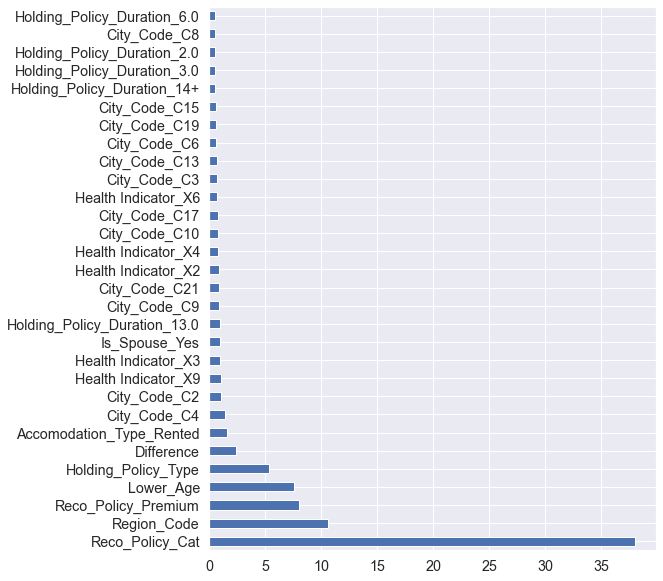

In [125]:
feat_imp = pd.Series(CB.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [126]:
y_prediction = np.hstack([sample,y_cb])

In [127]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("cb.csv",index=False)

# Ensemble

It Enclude Ensemble Of LightGBM & CatBoost

In [128]:
y_lgb

array([[0.82115372],
       [0.64466784],
       [0.47683954],
       ...,
       [0.00548931],
       [0.70221651],
       [0.07260637]])

In [129]:
y_cb

array([[0.73932895],
       [0.48440613],
       [0.51325704],
       ...,
       [0.01201606],
       [0.57400177],
       [0.18364881]])

In [130]:
lgbm = 0.7
cb = 0.3

In [131]:
y_ensemble = y_lgb*lgbm + y_cb*cb

In [132]:
y_ensemble

array([[0.79660629],
       [0.59658932],
       [0.48776479],
       ...,
       [0.00744733],
       [0.66375209],
       [0.1059191 ]])

In [133]:
y_ensemble = np.array(y_ensemble).reshape(-1,1)

In [134]:
y_prediction = np.hstack([sample,y_ensemble])

In [135]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Response"])
df.to_csv("ensemble.csv",index=False)